In [27]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [19]:
bathy = xr.open_dataset('../../../grid/bathymetry_201702.nc')
jetty = xr.open_dataset('../../../grid/jetty_mask_bathy201702.nc')

In [6]:
imin, imax = 405, 445
jmin, jmax = 280, 320

In [47]:
print (bathy.Bathymetry[imin+22:imin+24, jmin+18:jmin+19])

<xarray.DataArray 'Bathymetry' (y: 2, x: 1)>
array([[13.],
       [13.]])
Dimensions without coordinates: y, x
Attributes:
    units:      metres
    long_name:  sea_floor_depth


(15.0, 27.0)

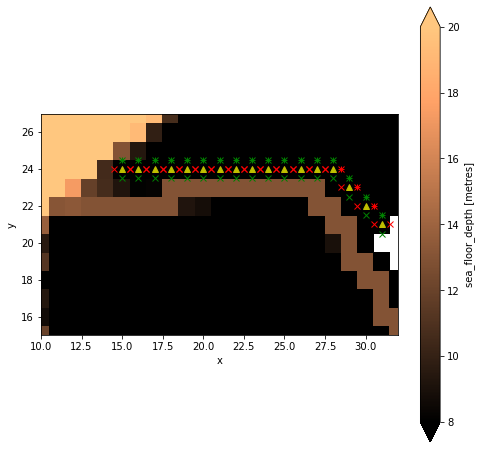

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
bathy.Bathymetry[imin:imax, jmin:jmax].plot(ax=ax, cmap='copper', vmax=20, vmin=8);
viz_tools.set_aspect(ax);
#ax.plot([18, 18], [22, 23], 'yo')
for i in range(imin, imax):
    for j in range(jmin, jmax):
        if jetty.bfr_coef_u[i, j] == 1:
            ax.plot(j - jmin + 0.5, i - imin, 'r+')
        if jetty.bfr_coef_v[i, j] == 1:
            ax.plot(j - jmin, i - imin + 0.5, 'g+')
            ax.plot(j - jmin, i - imin, 'y^')
            ax.plot(j - jmin, i - imin + 0.5, 'gx')
            ax.plot(j - jmin, i - imin - 0.5, 'gx')
            ax.plot(j - jmin + 0.5, i - imin, 'rx')
            ax.plot(j - jmin - 0.5, i - imin, 'rx')
ax.set_xlim(10, 32)
ax.set_ylim(15, 27)

In [23]:
jetty.bfr_coef_u

<xarray.DataArray 'bfr_coef_u' (y: 898, x: 398)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
Attributes:
    units:      none
    long_name:  friction_x_binary_mask